<a href="https://colab.research.google.com/github/Vivek432190/Public/blob/main/Week4%20Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Compare churn count with respect to gender

In [39]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.xlsx to Telco-Customer-Churn (1).xlsx


In [40]:
import io
data = pd.read_excel(io.BytesIO(uploaded['Telco-Customer-Churn.xlsx']))
print(data)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1        

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [41]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [42]:
data[['gender','Churn']]

,gender,Churn
0,Female,No
1,Male,No
2,Male,Yes
3,Male,No
4,Female,Yes
...,...,...
7038,Male,No
7039,Female,No
7040,Female,No
7041,Male,Yes


In [43]:
Female_churn_count = data.query('Churn=="Yes" & gender=="Female"')['gender'].count()
print(Female_churn_count)

939


In [44]:
Male_churn_count = data.query('Churn=="Yes" & gender=="Male"')['gender'].count()
print(Male_churn_count)

930


Below graph shows that the churn count (Churn column = Yes) is more for Females compared to males


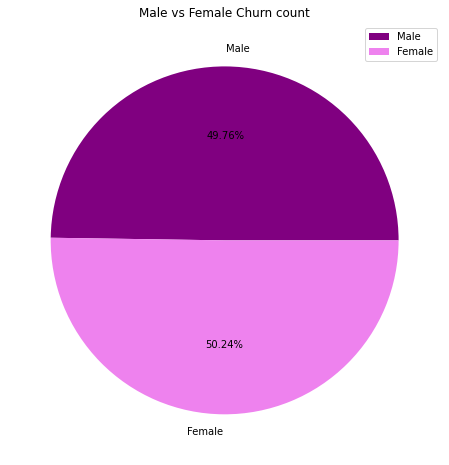

In [45]:
from matplotlib.font_manager import FontProperties
print('Below graph shows that the churn count (Churn column = Yes) is more for Females compared to males')
plt.figure(figsize = (8,8))
y = np.array([Male_churn_count,Female_churn_count])
mylabels = ['Male','Female']
mycolors = ['purple','violet']
plt.pie(y, labels = mylabels, colors = mycolors,autopct='%1.2f%%')
plt.legend()
plt.title('Male vs Female Churn count')
plt.show()

Find out how many female senior citizens there in the dataset

In [52]:
Female_senior_citizens = data.query('SeniorCitizen== 1 & gender=="Female"')['gender'].count()
print('No of female senior citizens is:\n',Female_senior_citizens)

No of female senior citizens is:
 568


Compare 'tenure' with 'Total Charges'

As the tenure increases the total charges also increase. They are both positively corelated


Text(0, 0.5, 'Total Charges')

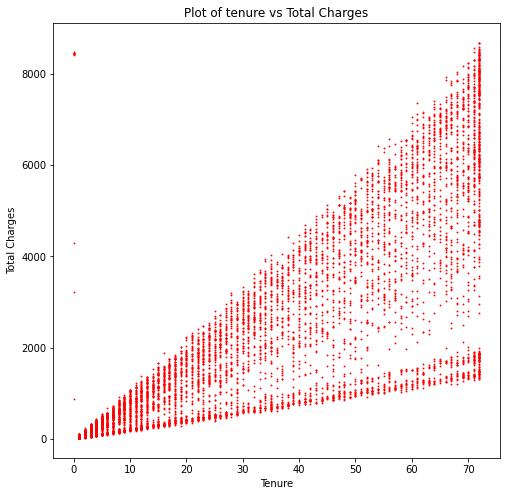

In [59]:
print ('As the tenure increases the total charges also increase. They are both positively corelated')
plt.figure(figsize = (8,8))
plt.scatter(data['tenure'],data['TotalCharges'],s=3,marker = '.', c = 'Red')
plt.title('Plot of tenure vs Total Charges')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

Find out which contract is preferred by the senior citizen.

In [95]:
data1 = data[data["SeniorCitizen"]==1]
maxim = data1['Contract'].value_counts().idxmax()
print('The contract preffered by senior citizen is\n',maxim)

The contract preffered by senior citizen is
 Month-to-month


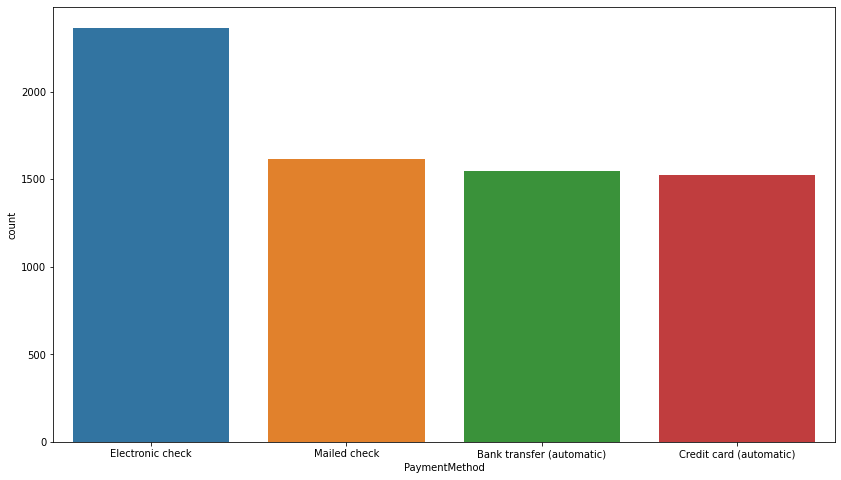

In [102]:
print('The most preferred payement method is Electronic check')
plt.figure(figsize = (14,8))
ax = sns.countplot(x="PaymentMethod",data= data)

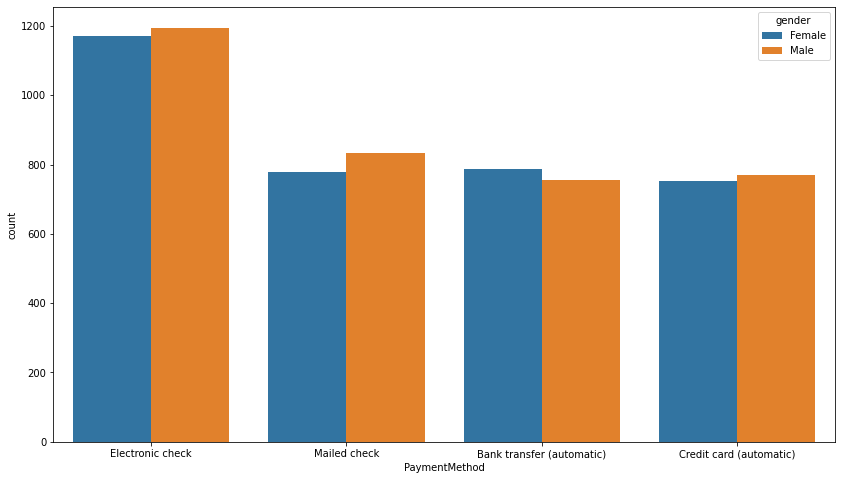

In [106]:
print("Genderwise distribution of payement method")
plt.figure(figsize = (14,8))
ax = sns.countplot(x="PaymentMethod",hue = 'gender', data= data)